## Background
The marketing department has been gathering potential prospect data for several years by
maintaining a repository in their data warehouse. The health of contact data is critical to manage
and execute effective campaigns and for that purpose the team is keen to initiate a cleansing
exercise starting with minimising data duplications.
Their approach is to design a system that automatically match records with each other and identify
potential duplicate entries and have them resolved using human experts. As records are compared
amongst themselves, the distinct records should be retained, whereas, the potential duplicates are
sent to experts that examine and identify which of the duplicate record should be retained based on
factors such as age of the record, etc.

## Design
To automatically identify duplicate and distinct records (dotted line above), the team is interested in
using machine learning models. Given any two records of prospects within the database, their
approach is to introduce new features that compare the main text values of two records and return
a number that indicate how close is their match. For example, the organisation’s name of the two
records can be compared using Jaro-Winkler method which returns a number indicating how closely
they resemble each other. This new comparative attribute is added as a feature called ‘Name_Score’
which has a value of 100 when there is an exact match between two name strings.
From the past manual exercises which compared two records to identify duplicates, the team have
put together a training set that consists of the following:
Name_Score: A number between (0 and 100) indicating how closely two names match
Address_Score: A number between (0 and 100) indicating how closely two addresses match
City_Score: A number between (0 and 100) indicating how closely two cities match
URL_Score: A number between (0 and 100) indicating how closely two URLs match
Phone_Score: A number between (0 and 100) indicating how closely two phone numbers match

## Output: 
Classification by data stewards as duplicate or distinct based on above features that
compare two records
1) Analyse the attached data to uncover relationships between the input and the output
2) Develop a machine learning model and present the results (model choice, accuracy, F1-Score)
3) How do you propose to deploy this model in practise?

In [1]:
# TODO: Handle class imbalance

import pandas as pd
# Environment settings
pd.set_option('display.max_columns', None) # to show all columns
pd.set_option('display.max_rows', None) # to show all rows
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading the data
df=pd.read_excel('data.xlsx', engine='openpyxl')
df.head(10)

,Name_Score,Address_Score,City_Score,URL_Score,Phone_Score,Classification
0,98,78,93,98,91,Duplicate
1,96,76,92,86,87,Distinct
2,94,90,74,90,93,Duplicate
3,94,77,67,87,88,Distinct
4,93,84,97,92,93,Duplicate
5,98,81,86,89,97,Duplicate
6,93,75,95,98,87,Duplicate
7,87,94,93,93,87,Distinct
8,98,79,92,88,87,Distinct
9,95,90,72,97,87,Duplicate


In [4]:
df.head()

,Name_Score,Address_Score,City_Score,URL_Score,Phone_Score,Classification
0,98,78,93,98,91,Duplicate
1,96,76,92,86,87,Distinct
2,94,90,74,90,93,Duplicate
3,94,77,67,87,88,Distinct
4,93,84,97,92,93,Duplicate


In [5]:
df.Classification.value_counts()

Classification
Distinct     680
Duplicate    319
Name: count, dtype: int64

## Understanding data

In [4]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (999, 6)


In [5]:
df.dtypes

Name_Score         int64
Address_Score      int64
City_Score         int64
URL_Score          int64
Phone_Score        int64
Classification    object
dtype: object

In [6]:
#Checking duplicates
print('Duplicate entries: {}'.format(df.duplicated().sum()))

Duplicate entries: 0


In [7]:
df.describe()

,Name_Score,Address_Score,City_Score,URL_Score,Phone_Score
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,91.552553,84.941942,81.699700,91.362362,88.876877
std,4.042236,6.034024,9.495696,4.114935,5.448967
min,85.000000,75.000000,65.000000,85.000000,80.000000
25%,88.000000,80.000000,73.000000,88.000000,84.000000
50%,92.000000,85.000000,82.000000,91.000000,89.000000
75%,95.000000,90.000000,90.000000,95.000000,94.000000
max,98.000000,95.000000,98.000000,98.000000,98.000000


In [8]:
# Check for missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

Classification    0
Phone_Score       0
URL_Score         0
City_Score        0
Address_Score     0
Name_Score        0
dtype: int64

In [9]:
# Check unique values in each column
df.nunique() 

Name_Score        14
Address_Score     21
City_Score        34
URL_Score         14
Phone_Score       19
Classification     2
dtype: int64

In [10]:
df.Classification.value_counts() 

Distinct     680
Duplicate    319
Name: Classification, dtype: int64

## Some visualizations 

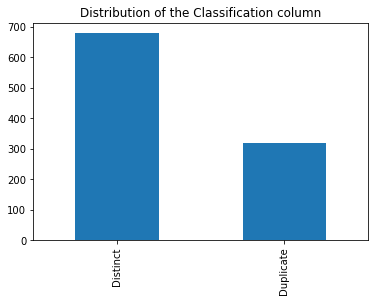

In [11]:
df.Classification.value_counts(dropna=False).plot(kind='bar',
                                                 title='Distribution of the Classification column')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010C682B0>,
      dtype=object)

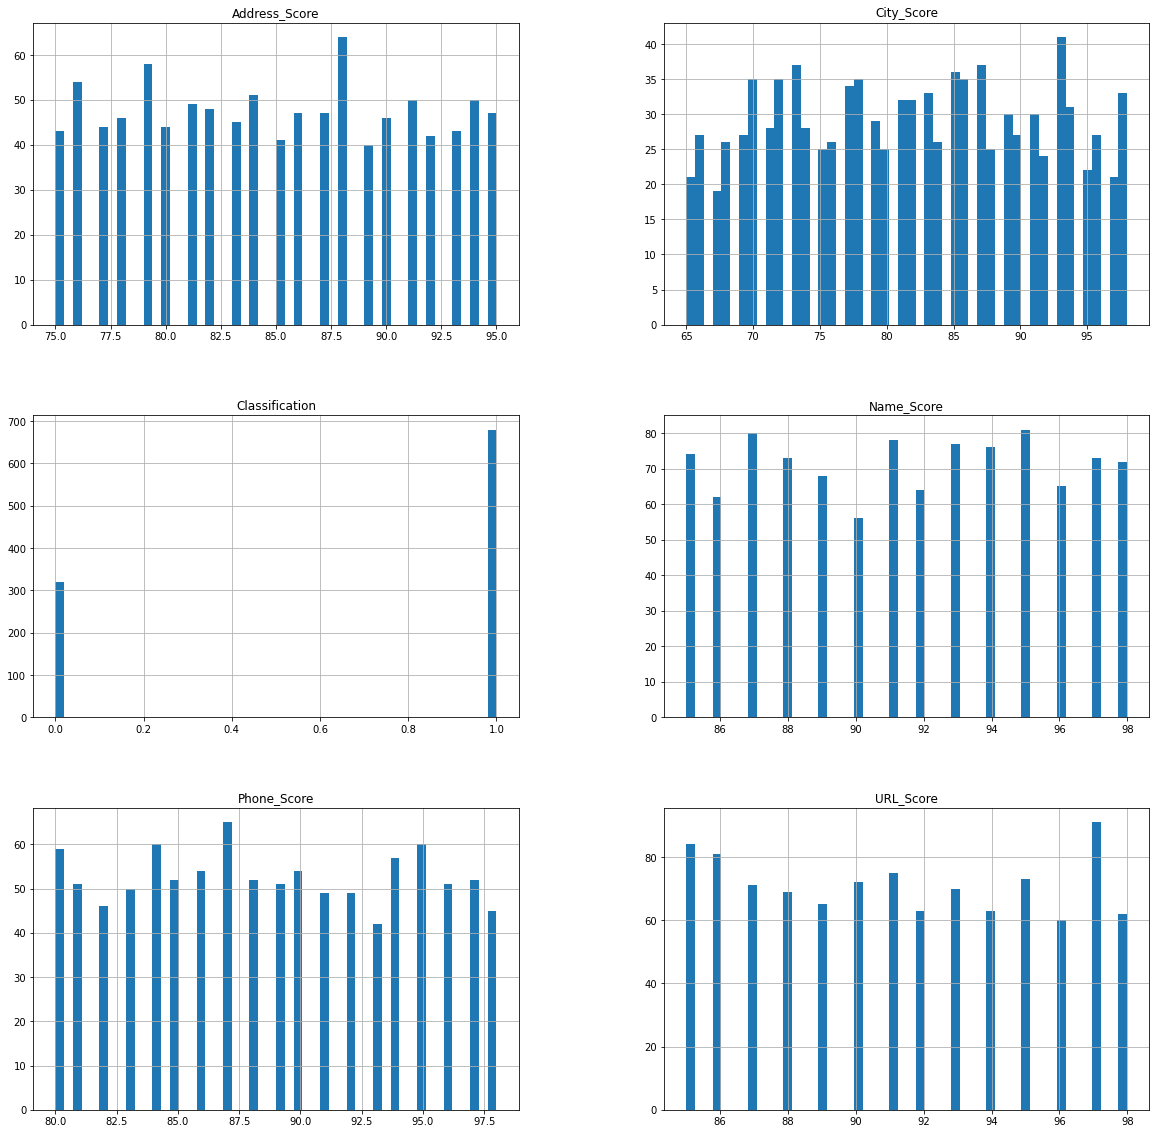

In [109]:
df.hist(bins=50,figsize=(20,20))

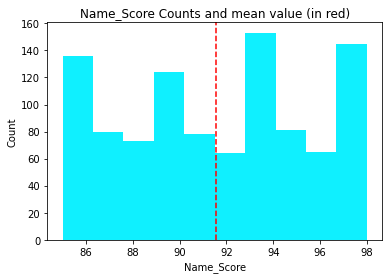

In [14]:
# Column distribution and their means
def plot_feature(featurename):
    plt.hist(df[featurename],histtype="bar",rwidth=1.2,color='#0ff0ff') #hist() is used to plot a histogram
    plt.xlabel(featurename) #set the xlabel name
    plt.ylabel('Count') # set the ylabel name
    plt.title(featurename+" Counts and mean value (in red)") # Set title
    plt.plot()
    plt.axvline(df[featurename].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
    plt.show()
    
plot_feature("Name_Score")

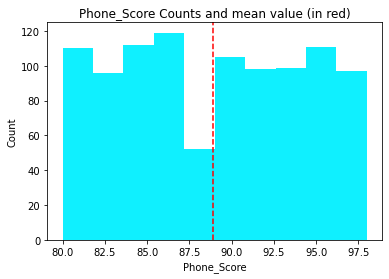

In [15]:
plot_feature("Phone_Score")

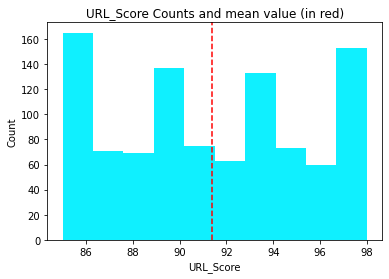

In [16]:
plot_feature("URL_Score")

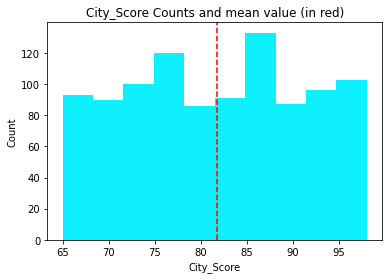

In [17]:
plot_feature("City_Score")

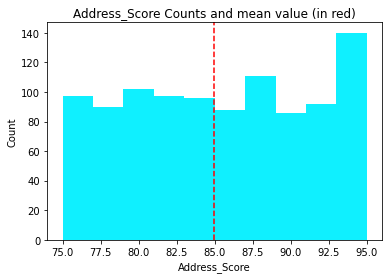

In [18]:
plot_feature("Address_Score")

## Question1: Analyse the attached data to uncover relationships between the input and the output

In [20]:
df.head()

,Name_Score,Address_Score,City_Score,URL_Score,Phone_Score,Classification
0,98,78,93,98,91,Duplicate
1,96,76,92,86,87,Distinct
2,94,90,74,90,93,Duplicate
3,94,77,67,87,88,Distinct
4,93,84,97,92,93,Duplicate


In [21]:
# Mapping the Classification column
df['Classification']= df['Classification'].map({'Duplicate':0, 'Distinct':1})

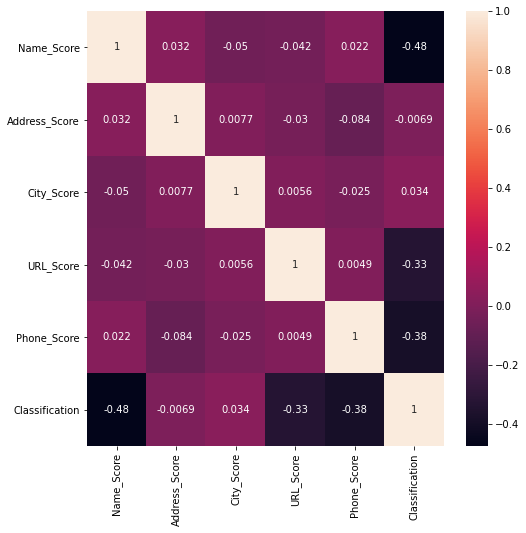

In [22]:
# corelation plots to understand relation between input and output
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [23]:
corr['Classification'].sort_values(ascending=False)

Classification    1.000000
City_Score        0.034432
Address_Score    -0.006949
URL_Score        -0.326488
Phone_Score      -0.383698
Name_Score       -0.475489
Name: Classification, dtype: float64

Address and city score are less corelated.

## Input output visualization plots 

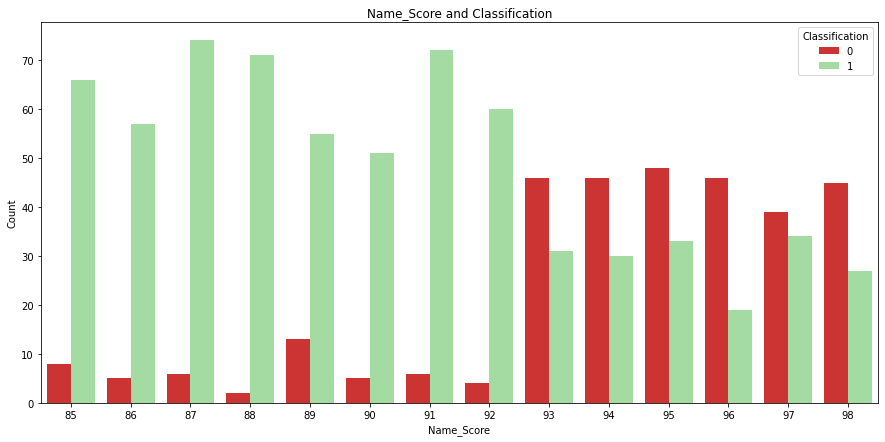

In [111]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"{col.title()} and Classification", xlabel=f"{col.title()}", ylabel="Count")
    if labels!=None:
        ax.set_xticklabels(labels)

plot_col(col='Name_Score', hue='Classification')

Above Name score value 93,duplicate rows exits.

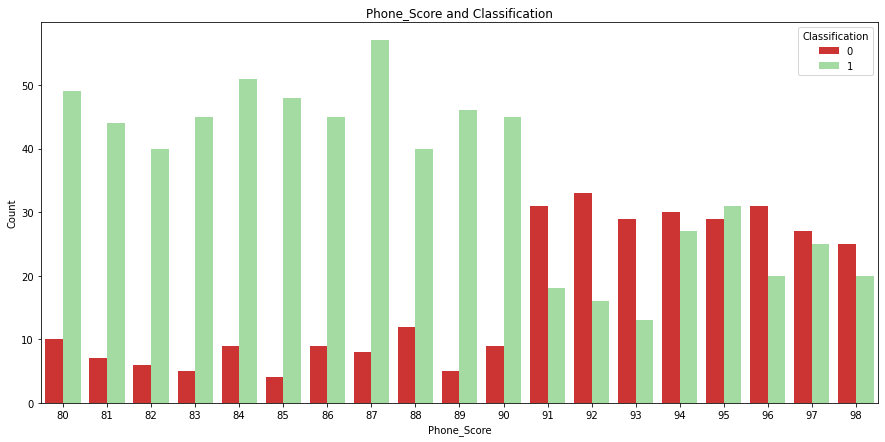

In [112]:
plot_col(col='Phone_Score', hue='Classification')

Above Phone score 90,duplicate rows exits.

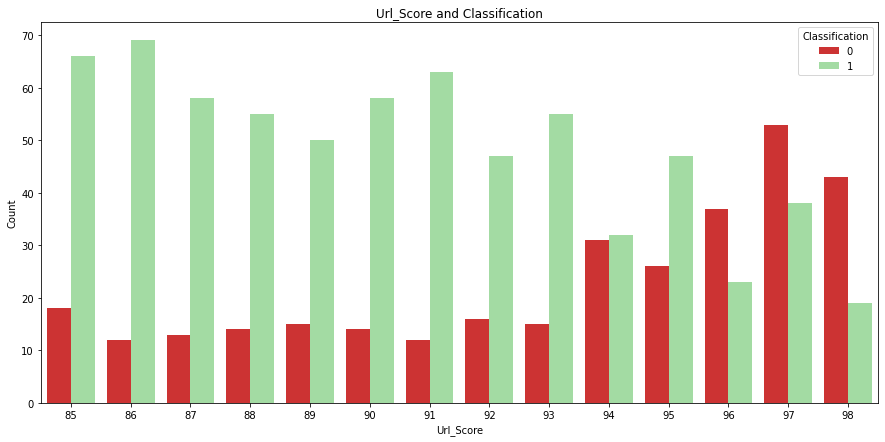

In [113]:
plot_col(col='URL_Score', hue='Classification')

Above URL score 94,duplicate rows exits.

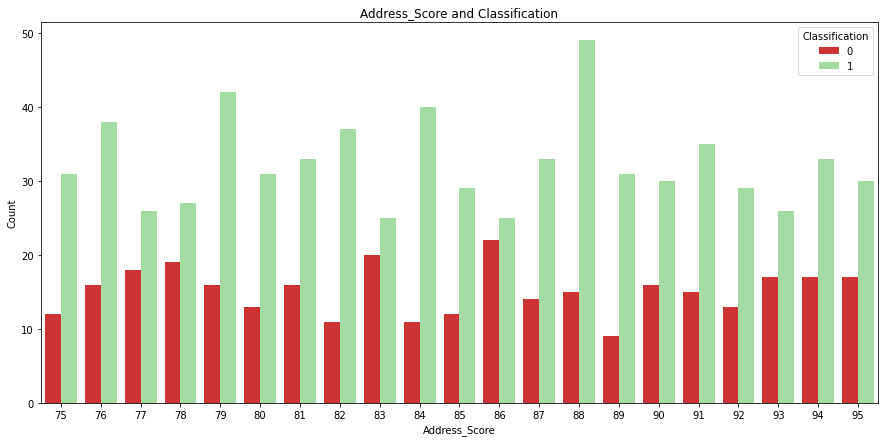

In [114]:
plot_col(col='Address_Score', hue='Classification')

Address score show sinosidual pattern/no pattern.

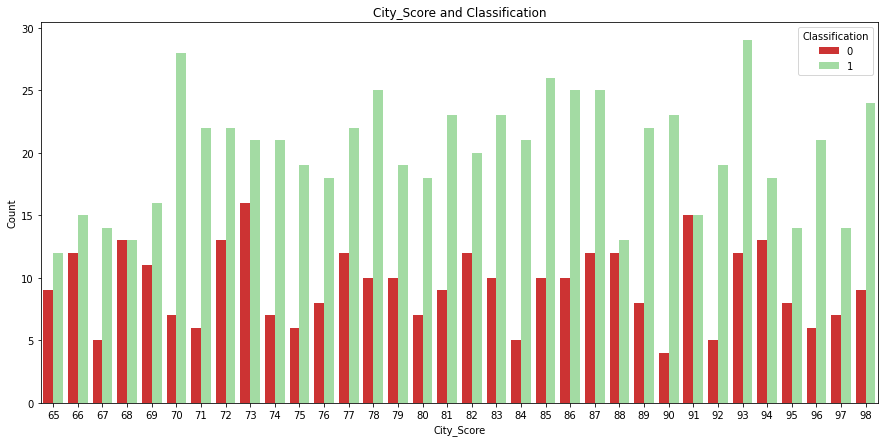

In [115]:
plot_col(col='City_Score', hue='Classification')

City score shows no pattern.

## Question2: Develop a machine learning model and present the results (model choice, accuracy, F1-Score)

In [29]:
# Selecting the features and the target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [30]:
X.head()

,Name_Score,Address_Score,City_Score,URL_Score,Phone_Score
0,98,78,93,98,91
1,96,76,92,86,87
2,94,90,74,90,93
3,94,77,67,87,88
4,93,84,97,92,93


In [31]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Classification, dtype: int64

In [71]:
### Train Test Split, stratified as imbalanced classes
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

### Decision Tree classifier

In [68]:
### Implement Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#max_features="auto" for a deeper tree
dtclassifier=DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)

## Prediction on test
y_pred=dtclassifier.predict(X_test)

### Check Accuracy
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 1.0


In [69]:
#Print the tree
from sklearn import tree
#  Print the tree
text_representation = tree.export_text(dtclassifier,feature_names=['Name_Score', 'Address_Score', 'City_Score', 'URL_Score',
       'Phone_Score'])
print(text_representation)

|--- Name_Score <= 92.50
|   |--- URL_Score <= 95.50
|   |   |--- class: 1
|   |--- URL_Score >  95.50
|   |   |--- Phone_Score <= 90.50
|   |   |   |--- class: 1
|   |   |--- Phone_Score >  90.50
|   |   |   |--- class: 0
|--- Name_Score >  92.50
|   |--- Phone_Score <= 90.50
|   |   |--- URL_Score <= 93.50
|   |   |   |--- class: 1
|   |   |--- URL_Score >  93.50
|   |   |   |--- class: 0
|   |--- Phone_Score >  90.50
|   |   |--- class: 0



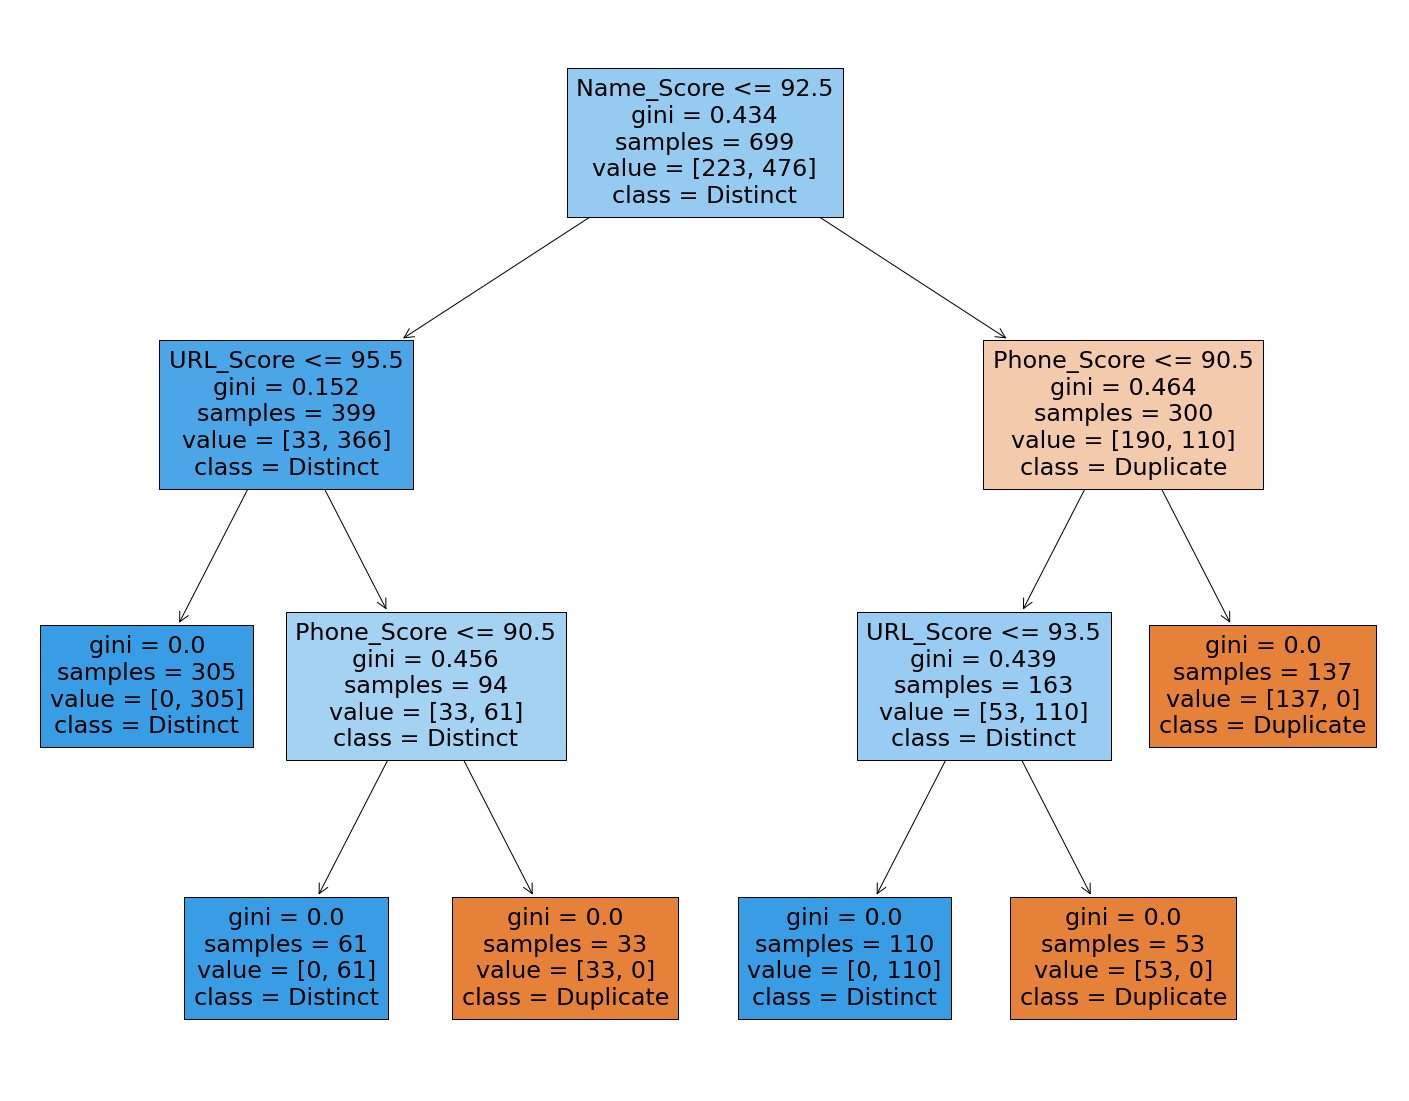

In [70]:
fig = plt.figure(figsize=(25,20))
treeplot = tree.plot_tree(dtclassifier, 
                   feature_names=X.columns,
                   class_names=['Duplicate', 'Distinct'],
                   filled=True)

Decision Tree seems to use only 3 features, however the task at hand seems to consider all features equally as duplicates in address and city etc should also be considered. Decision tree with all features gave accuracy 98.6.

Now, trying random forest classifier.

### Random Forest classifier

Accuracy: 1.0
F1 score:  1.0
Precision: 1.0
Recall: 1.0


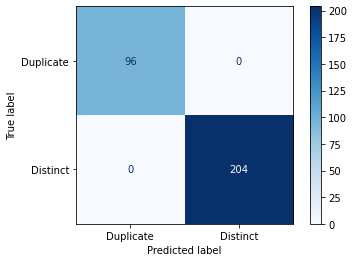

In [105]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

#Random Forest Classifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

## Prediction on test
y_pred=classifier.predict(X_test)

### Check Metrics
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)
print("F1 score: ",f1_score(y_test, y_pred))
print ("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

#print("Confusion matrix\n",confusion_matrix(y_pred,y_test))
#target_names = ['Duplicate', 'Distinct']
#print(classification_report(y_test, y_pred, target_names=target_names))

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=["Duplicate", "Distinct"],
                                 cmap=plt.cm.Blues)

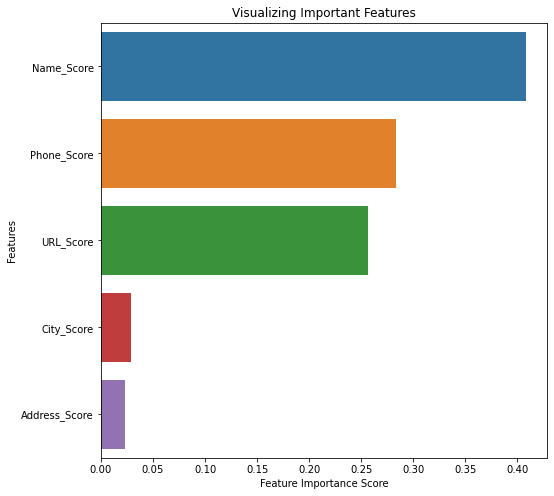

In [58]:
# Plotting  feature importances

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
feature_imp = pd.Series(classifier.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

plt.figure(figsize=(8,8))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [94]:
params=classifier.get_params(deep=True)
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Stratified k fold
Trying out kfold on the data

In [103]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]

folds= 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

for train_index,test_index in skf.split(X,y):
    #create data for each fold
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction=classifier.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)
import numpy as np
print("Mean accuracy:",np.array(accuracy).mean())

[1.0, 1.0, 1.0, 1.0, 1.0]
Mean accuracy: 1.0


In [40]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

## Question3: Deploy the machine learning model using Streamlit

In [41]:
# Streamlit app
# Type streamlit run app.py

In [42]:
%%writefile app.py
 
import pickle
import streamlit as st

# loading the trained model
pickle_in = open("classifier.pkl", "rb") 
classifier = pickle.load(pickle_in)

# defining the function which will make the prediction using the data which the user inputs 
def prediction(Name_Score,Address_Score,City_Score,URL_Score,Phone_Score):
    # Making predictions 
    prediction = classifier.predict( [[Name_Score,Address_Score,City_Score,URL_Score,Phone_Score]] )
    if prediction == 0:
        pred = 'Duplicate'
    else:
        pred = 'Distinct'
    return pred

def main():
    #st.title("Data Cleaner")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Data Cleaner ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    
    #Frontend
    name_Score = st.number_input("Name_Score",min_value=0, max_value=100,value=100)
    address_Score = st.number_input("Address_Score",min_value=0, max_value=100,value=10)
    city_Score = st.number_input("City_Score",min_value=0, max_value=100,value=100)
    url_Score = st.number_input("URL_Score",min_value=0, max_value=100,value=100)
    phone_Score = st.number_input("Phone_Score",min_value=0, max_value=100,value=100)
    
    result=""
    if st.button("Predict"):
        result=prediction(name_Score,address_Score,city_Score,url_Score,phone_Score)
        st.success('The output is {}'.format(result))
        
if __name__=='__main__':
    main()
    



Overwriting app.py
